Converged users: 7987
Unconverged users: 2012


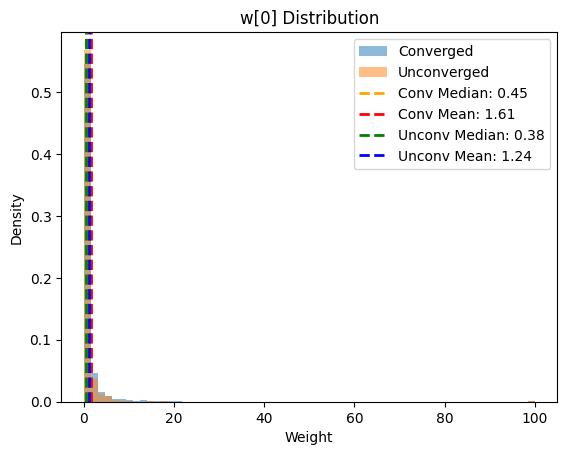

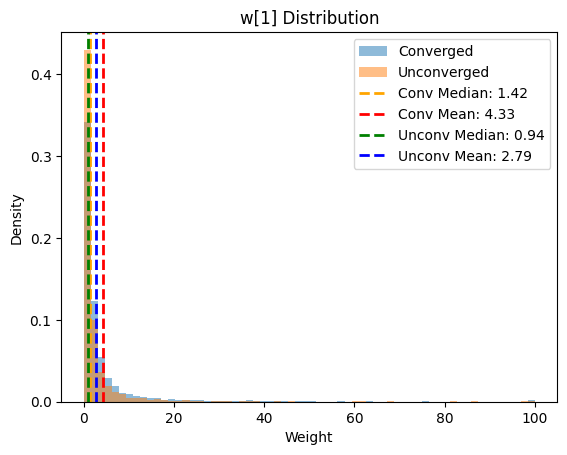

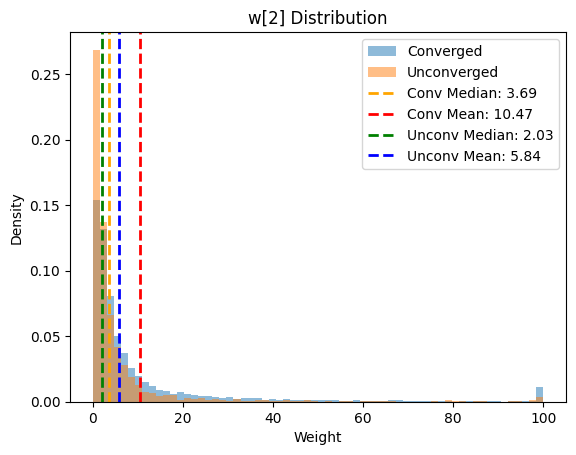

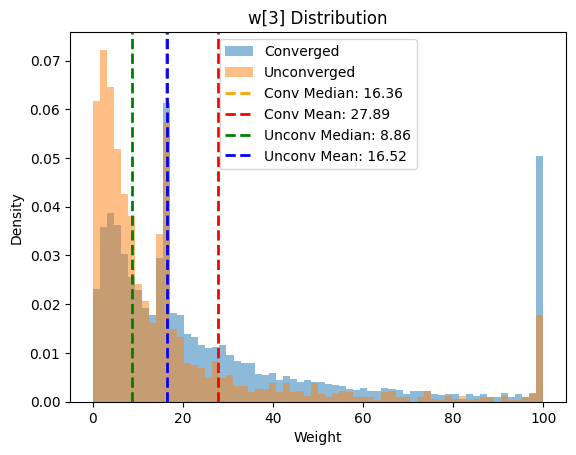

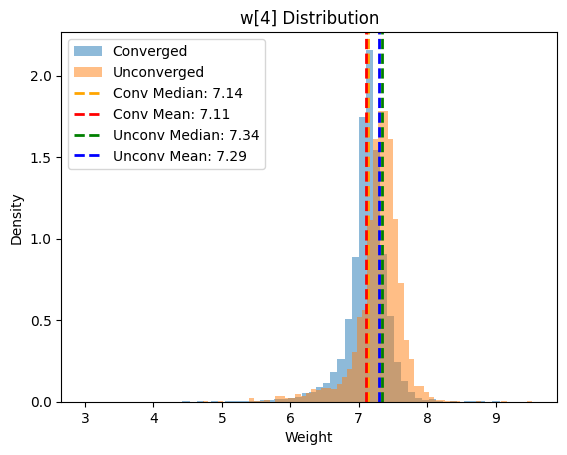

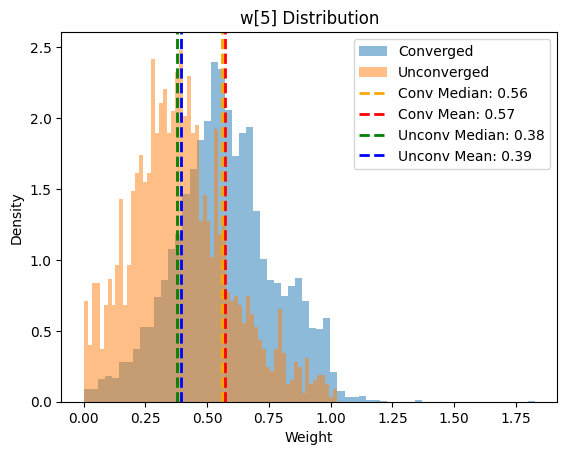

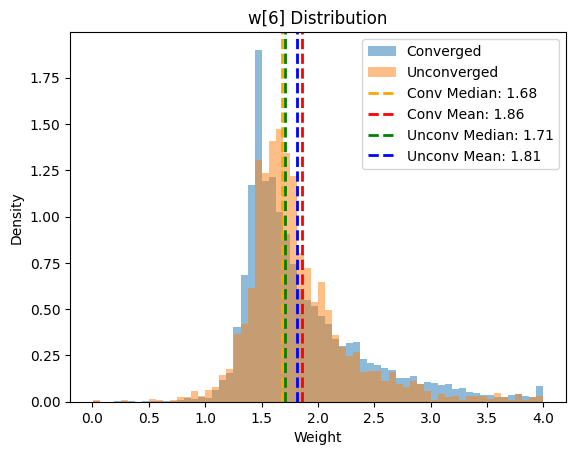

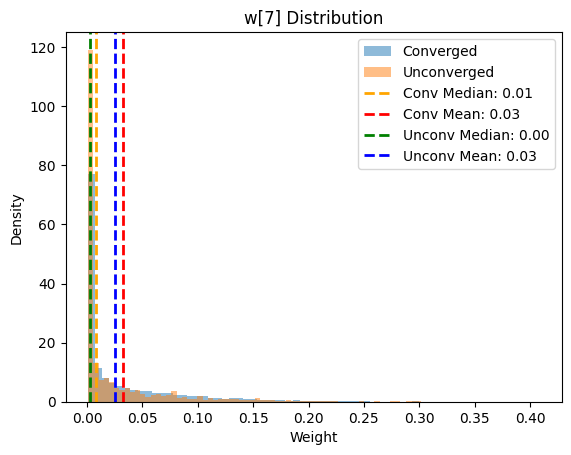

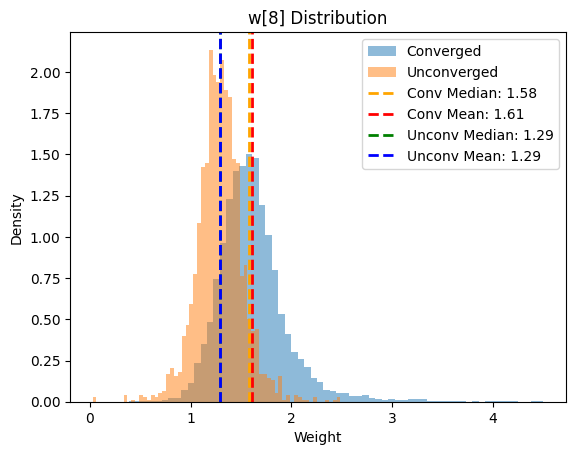

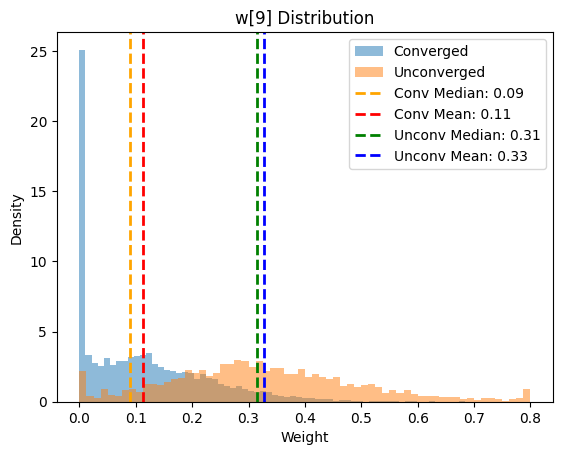

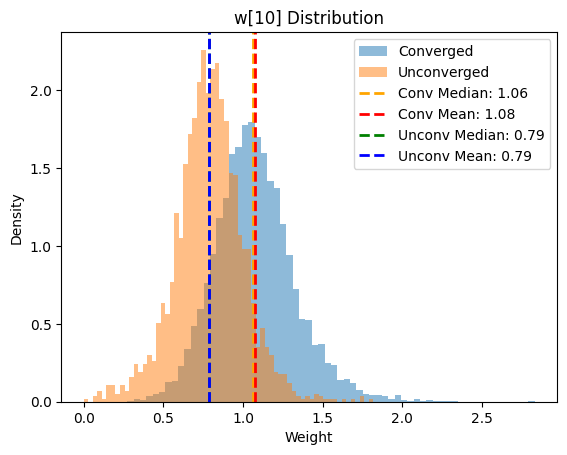

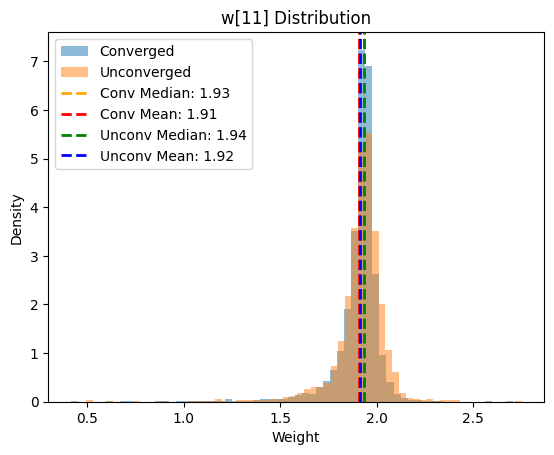

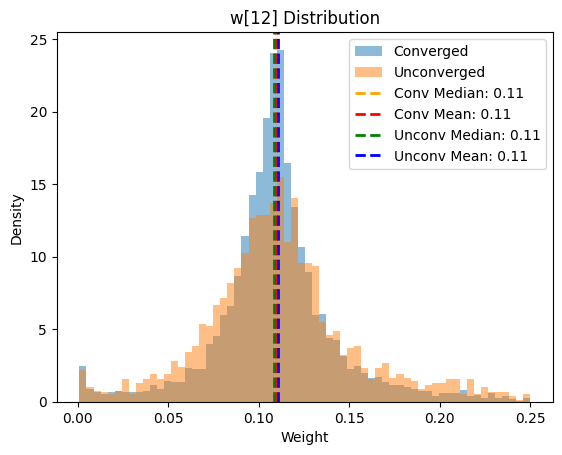

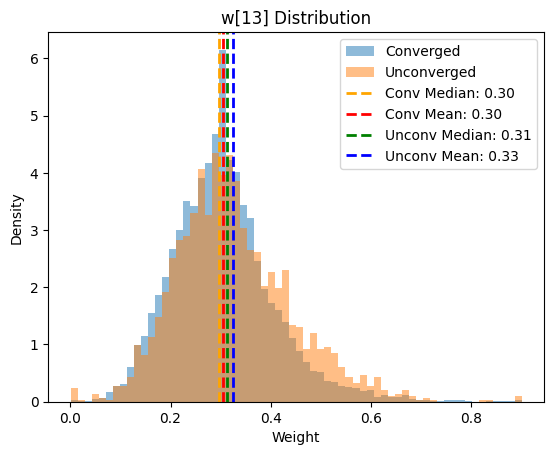

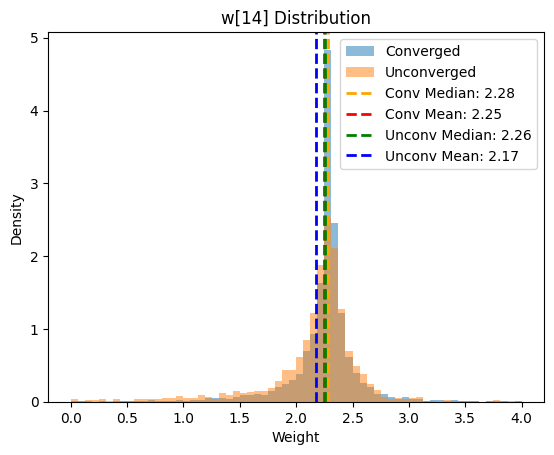

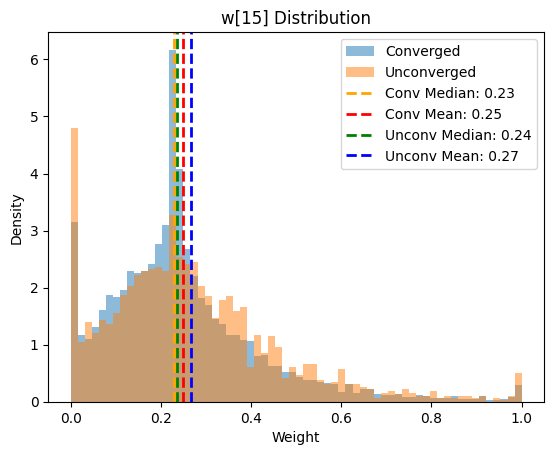

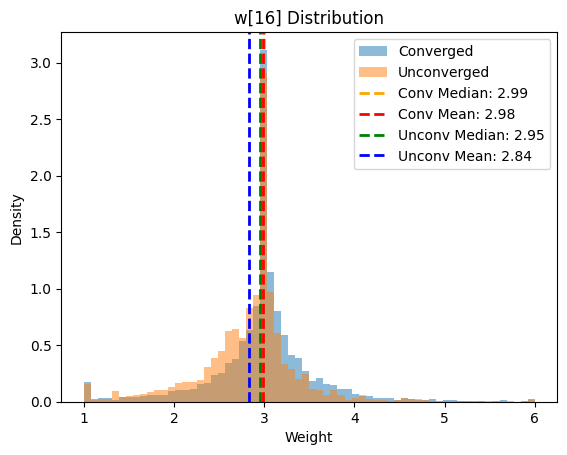

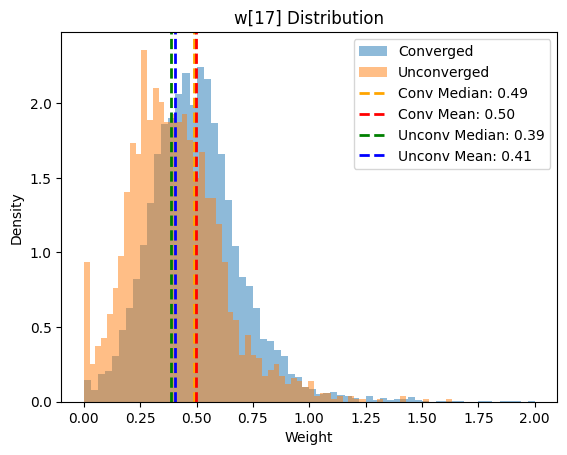

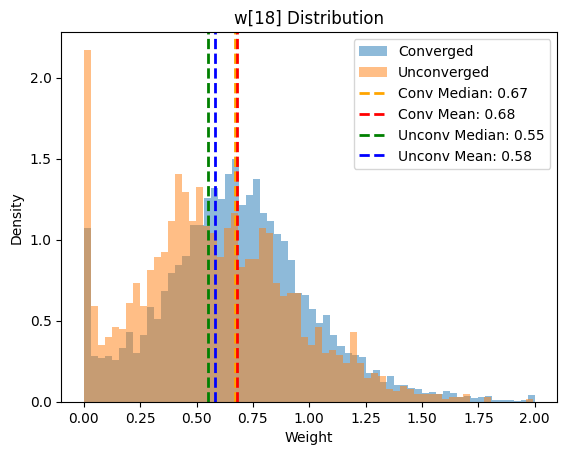

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import json

with open("unconverged_users.json", "r") as f:
    unconverged_users = json.load(f)

parameters_file = Path("../srs-benchmark/result/FSRS-rs.jsonl")
parameters = list(map(lambda x: json.loads(x), open(parameters_file).readlines()))
parameters = {
    param["user"]: param
    for param in map(lambda x: json.loads(x), open(parameters_file).readlines())
}

# Split weights into converged and unconverged
converged_weights = []
unconverged_weights = []

for user_id, param in parameters.items():
    if user_id in unconverged_users:
        unconverged_weights.append(param["parameters"]["0"])
    else:
        converged_weights.append(param["parameters"]["0"])

converged_weights = np.array(converged_weights)
unconverged_weights = np.array(unconverged_weights)

print(f"Converged users: {len(converged_weights)}")
print(f"Unconverged users: {len(unconverged_weights)}")

Path("./plots").mkdir(parents=True, exist_ok=True)
for i in range(19):
    plt.hist(
        converged_weights[:, i], bins=64, alpha=0.5, label="Converged", density=True
    )
    plt.hist(
        unconverged_weights[:, i], bins=64, alpha=0.5, label="Unconverged", density=True
    )

    conv_median = np.median(converged_weights[:, i])
    conv_mean = np.mean(converged_weights[:, i])
    unconv_median = np.median(unconverged_weights[:, i])
    unconv_mean = np.mean(unconverged_weights[:, i])

    plt.axvline(
        conv_median,
        color="orange",
        linestyle="dashed",
        linewidth=2,
        label=f"Conv Median: {conv_median:.2f}",
    )
    plt.axvline(
        conv_mean,
        color="red",
        linestyle="dashed",
        linewidth=2,
        label=f"Conv Mean: {conv_mean:.2f}",
    )
    plt.axvline(
        unconv_median,
        color="green",
        linestyle="dashed",
        linewidth=2,
        label=f"Unconv Median: {unconv_median:.2f}",
    )
    plt.axvline(
        unconv_mean,
        color="blue",
        linestyle="dashed",
        linewidth=2,
        label=f"Unconv Mean: {unconv_mean:.2f}",
    )

    plt.xlabel("Weight")
    plt.ylabel("Density")
    plt.legend()
    plt.title(f"w[{i}] Distribution")
    # plt.savefig(f"./plots/w[{i}]_comparison.png")
    plt.show()
    plt.clf()